In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = True

import matplotlib as mpl
mpl.rc("figure", dpi=200)

In [ ]:
# load the data
from natto import input 
from natto import process
from ubergauss import tools
from lmz import *

names = ['Bonemarrow_10xchromium_SRA779509-SRS3805245_6248',
 'Bonemarrow_10xchromium_SRA779509-SRS3805255_7559',
 'Bonemarrow_10xchromium_SRA779509-SRS3805258_5683',
 'Bonemarrow_10xchromium_SRA779509-SRS3805262_6431',
 'Bonemarrow_10xchromium_SRA779509-SRS3805266_6210',
 'Colon_10xchromium_SRA703206-SRS3296611_4826',
 'Colon_10xchromium_SRA703206-SRS3296612_6476',
 'Colon_10xchromium_SRA728025-SRS3454425_3429',
 'Colon_10xchromium_SRA728025-SRS3454426_3423',
 'Colon_10xchromium_SRA728025-SRS3454428_5459',
 'Colon_10xchromium_SRA728025-SRS3454430_4910',
 'Cordblood_10xchromium_SRA769148-SRS3747193_2674',
 'Cordblood_10xchromium_SRA769148-SRS3747194_2581',
 'Cordblood_10xchromium_SRA769148-SRS3747195_2160',
 'Cordblood_10xchromium_SRA769148-SRS3747196_2292',
 'Cordblood_10xchromium_SRA769148-SRS3747197_2500',
 'Cordblood_10xchromium_SRA769148-SRS3747198_3906',
 'Kaposissarcoma_10xchromium_SRA843432-SRS4322341_3493',
 'Kaposissarcoma_10xchromium_SRA843432-SRS4322342_3372',
 'Kaposissarcoma_10xchromium_SRA4306',
 'Kaposissarcoma_10xchromium_SRA843432-SRS4322345_3718',
 'Kaposissarcoma_10xchromium_SRA843432-SRS4322346_4479',
 'Ovariantumor_10xchromium_SRA634975-SRS2724911_2547',
 'Ovariantumor_10xchromium_SRA634975-SRS2724912_2139',
 'Ovariantumor_10xchromium_SRA634975-SRS2724913_2262',
 'Ovariantumor_10xchromium_SRA634975-SRS2724914_2094',
 'Prostate_10xchromium_SRA742961-SRS3565195_6101',
 'Prostate_10xchromium_SRA742961-SRS3565196_7789',
 'Prostate_10xchromium_SRA742961-SRS3565197_11468',
 'Prostate_10xchromium_SRA742961-SRS3565198_7718',
 'Prostate_10xchromium_SRA742961-SRS3565199_8069',
 'Prostate_10xchromium_SRA742961-SRS3565201_7479',
 'Prostate_10xchromium_SRA742961-SRS3565203_6453',
 'Prostate_10xchromium_SRA742961-SRS3565206_6950',
 'Prostate_10xchromium_SRA742961-SRS3565208_8538',
 'Prostate_10xchromium_SRA742961-SRS3565211_6264',
 'Tcells_10xchromium_SRA665712-SRS3034950_10979',
 'Tcells_10xchromium_SRA665712-SRS3034951_14332',
 'Tcells_10xchromium_SRA665712-SRS3034953_12974',
 'Tcells_10xchromium_SRA814476-SRS4073850_1975',
 'Tcells_drop-seq_SRA867342-SRS4550172_4068',
 'Tcells_drop-seq_SRA867342-SRS4550173_2768',
 'Testicle_10xchromium_SRA667709-SRS3065427_3045',
 'Testicle_10xchromium_SRA667709-SRS3065428_3007',
 'Testicle_10xchromium_SRA667709-SRS3065429_3066',
 'Testicle_10xchromium_SRA667709-SRS3065430_4020',
 'Testicle_10xchromium_SRA667709-SRS3065431_3586',
 'Testis_10xchromium_SRA645804-SRS2823404_4197',
 'Testis_10xchromium_SRA645804-SRS2823405_3598',
 'Testis_10xchromium_SRA645804-SRS2823406_3989',
 'Testis_10xchromium_SRA645804-SRS2823407_4046',
 'Testis_10xchromium_SRA645804-SRS2823408_4306',
 'Testis_10xchromium_SRA645804-SRS2823409_4791',
 'Testis_10xchromium_SRA645804-SRS2823410_4045',
 'Testis_10xchromium_SRA645804-SRS2823412_5299',
 'Testis_10xchromium_SRA645804-SRS3572594_4574']



bonus =  [ 'Testicle_10xchromium_SRA667709-SRS3065427_3045',
 'Testicle_10xchromium_SRA667709-SRS3065428_3007',
 'Testicle_10xchromium_SRA667709-SRS3065429_3066',
 'Testicle_10xchromium_SRA667709-SRS3065430_4020',
 'Testicle_10xchromium_SRA667709-SRS3065431_3586', 'Cordblood_10xchromium_SRA769148-SRS3747193_2674',
 'Cordblood_10xchromium_SRA769148-SRS3747194_2581',
 'Cordblood_10xchromium_SRA769148-SRS3747195_2160',
 'Cordblood_10xchromium_SRA769148-SRS3747196_2292',
 'Cordblood_10xchromium_SRA769148-SRS3747197_2500',
 'Cordblood_10xchromium_SRA769148-SRS3747198_3906']

import scanpy as sc

names = [a for a in input.get40names() + bonus if not a.startswith('Place')]
print(names)
def loadandgo(n):
    data = input.load100(n,path = '/home/ubuntu/repos/natto/natto/data')
    sc.pp.filter_cells(data, min_genes= 200, inplace=True)
    #sc.pp.subsample(data,n_obs = 1500)
    data.name = n
    return data
    #return process.annotate_genescores(data, mingenes = 1000)      

annotated = tools.xmap(loadandgo,names)



In [9]:
%time
# now we can take care of the similarity matrix 
from natto import tools as nt 
import numpy as np

np.seterr(all='raise')


def distance(a,b, seed):
    if a.X.shape[0] < 2000: 
        print (a.name)
    if b.X.shape[0] < 2000:
        print (b.name)
    a2 = sc.pp.subsample(a, copy=True, n_obs = 2000)
    b2 = sc.pp.subsample(b, copy=True, n_obs = 2000)
    a2= process.annotate_genescores(a2, quiet = True)
    b2=process.annotate_genescores(b2, quiet = True)
    return nt.cosine(a2,b2,numgenes = 400)

r = nt.apply_measures_mp(distance, annotated, repeats = 3)

CPU times: user 2 µs, sys: 5 µs, total: 7 µs
Wall time: 15 µs


<AxesSubplot:>

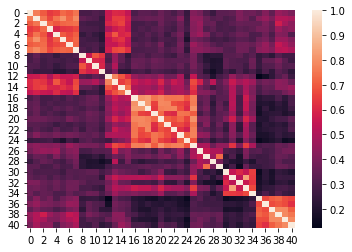

In [10]:
import numpy as np
r2 = np.mean(r, axis = 2)
import seaborn as sns
sns.heatmap(r2)

array([6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 5, 5, 5, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4],
      dtype=int32)

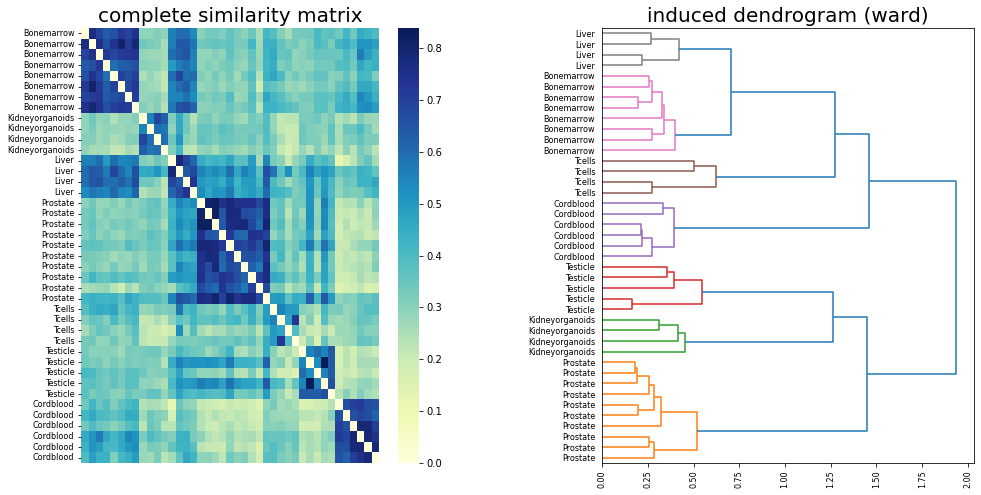

In [12]:
from natto.optimize.plot import dendro

shortnames = [n[:n.find('_')] for n in names]
np.fill_diagonal(r2,0)
dendro.manualclustermap(r2,shortnames, distancecut = .69)


41